<h1>Import Package</h1>

In [1]:
import os
import numpy as np
import pandas as pd
import nltk


from nltk.tokenize import sent_tokenize, word_tokenize 
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import wordnet
from nltk.tag import pos_tag
import re
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

In [2]:
#Viz
from matplotlib import pyplot as plt
import seaborn as sns


# Model
import random
import torch

import math
import torch
from transformers.activations import gelu
from transformers import (BertTokenizer, BertConfig, 
                          BertForSequenceClassification, BertPreTrainedModel, 
                          apply_chunking_to_forward, set_seed,BertModel
                          )
from transformers.modeling_outputs import (BaseModelOutputWithPastAndCrossAttentions, 
                                           BaseModelOutputWithPoolingAndCrossAttentions, 
                                           SequenceClassifierOutput,
                                           )


<h1>read data</h1>

In [3]:
# Read Data
data = pd.read_csv("/kaggle/input/review-movie-imdb-supes/review_movie_raw.csv")
df = pd.DataFrame(data)

movie = pd.DataFrame(data, columns=['review_movie'])
print(movie)

                                           review_movie
0     OK, I'll confess, this movie is definitely jun...
1     Perhaps I'm out of date or just don't know wha...
2     Well, it's not the worst superhero movie I've ...
3     Since I haven't read comics is quite a few yea...
4     This is absurd - aside from the fellow Austral...
...                                                 ...
1240  Really bad movie so many face palming scenes d...
1241  It was so good! The beginning, the narration, ...
1242  I got to watch this movie early because of a s...
1243  THE BATMAN (2022) *** Robert Pattinson, Zoe Kr...
1244  I'll say it started pretty good and I liked th...

[1245 rows x 1 columns]


mengecek apakah ada duplikasi data

penghapus duplikasi data

<h1>Cleaning Data</h1>

In [4]:
# List of characters to clean
character = ['.',',',';',':','-','...','?','!','(',')','[',']','{','}','<','>','"','/','\'','#','-','@',
             'a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z',
             'A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z']

# Function to remove repeated characters
def repeatcharClean(text): 
    for i in range(len(character)):
        charac_long = 5
        while charac_long > 2:
            char = character[i]*charac_long 
            text = text.replace(char,character[i])
            charac_long -= 1
    return text

# Function to clean review text
def clean_review(text):
    # Replace newline with space
    text = re.sub(r'\n', ' ', text)
    # Remove links
    text = re.sub(r"(https?:\/\/(?:www\.|(?!www))[a-zA-Z0-9][a-zA-Z0-9-]+[a-zA-Z0-9]\.[^\s]{2,}|www\.[a-zA-Z0-9][a-zA-Z0-9-]+[a-zA-Z0-9]\.[^\s]{2,}|https?:\/\/(?:www\.|(?!www))[a-zA-Z0-9]+\.[^\s]{2,}|www\.[a-zA-Z0-9]+\.[^\s]{2,})", "", text)
    # Remove hashtags
    text = re.sub(r'#(\S+)', r'\1', text)
    # Remove numbers and symbols
    text = re.sub('[^a-zA-Z]+', ' ', text)
    text = re.sub(r'[.,]', '', text)
    # Remove repeated characters
    text = repeatcharClean(text)
    # Remove extra spaces
    text = re.sub('[ ]+', ' ', text)
    
    
    
    return text

In [5]:
movie['cleaned_review'] = movie['review_movie'].apply(clean_review)
movie

,review_movie,cleaned_review
0,"OK, I'll confess, this movie is definitely jun...",OK I ll confess this movie is definitely junk ...
1,Perhaps I'm out of date or just don't know wha...,Perhaps I m out of date or just don t know wha...
2,"Well, it's not the worst superhero movie I've ...",Well it s not the worst superhero movie I ve e...
3,Since I haven't read comics is quite a few yea...,Since I haven t read comics is quite a few yea...
4,This is absurd - aside from the fellow Austral...,This is absurd aside from the fellow Australia...
...,...,...
1240,Really bad movie so many face palming scenes d...,Really bad movie so many face palming scenes d...
1241,"It was so good! The beginning, the narration, ...",It was so good The beginning the narration Bru...
1242,I got to watch this movie early because of a s...,I got to watch this movie early because of a s...
1243,"THE BATMAN (2022) *** Robert Pattinson, Zoe Kr...",THE BATMAN Robert Pattinson Zoe Kravitz Jeffre...


menyimpan hasil cleaning

In [6]:
# Menyimpan DataFrame yang sudah dibersihkan ke CSV
movie.to_csv('/kaggle/working/clean_review.csv', index=False)

<h1>CASEFOLDING</h1>

In [7]:
# Read Data
file_path = "/kaggle/working/clean_review.csv"
df = pd.read_csv(file_path)

print(df)

                                           review_movie  \
0     OK, I'll confess, this movie is definitely jun...   
1     Perhaps I'm out of date or just don't know wha...   
2     Well, it's not the worst superhero movie I've ...   
3     Since I haven't read comics is quite a few yea...   
4     This is absurd - aside from the fellow Austral...   
...                                                 ...   
1240  Really bad movie so many face palming scenes d...   
1241  It was so good! The beginning, the narration, ...   
1242  I got to watch this movie early because of a s...   
1243  THE BATMAN (2022) *** Robert Pattinson, Zoe Kr...   
1244  I'll say it started pretty good and I liked th...   

                                         cleaned_review  
0     OK I ll confess this movie is definitely junk ...  
1     Perhaps I m out of date or just don t know wha...  
2     Well it s not the worst superhero movie I ve e...  
3     Since I haven t read comics is quite a few yea...  
4

fungsi casefolding

In [8]:
# Function to apply casefolding
def casefolding(text):
    text = text.lower()
    text = text.strip()
    return text

# Apply casefolding to the 'cleaned_review' column
df['casefolding'] = df['cleaned_review'].apply(casefolding)

# Print the dataframe with the new casefolding column
print(df)

                                           review_movie  \
0     OK, I'll confess, this movie is definitely jun...   
1     Perhaps I'm out of date or just don't know wha...   
2     Well, it's not the worst superhero movie I've ...   
3     Since I haven't read comics is quite a few yea...   
4     This is absurd - aside from the fellow Austral...   
...                                                 ...   
1240  Really bad movie so many face palming scenes d...   
1241  It was so good! The beginning, the narration, ...   
1242  I got to watch this movie early because of a s...   
1243  THE BATMAN (2022) *** Robert Pattinson, Zoe Kr...   
1244  I'll say it started pretty good and I liked th...   

                                         cleaned_review  \
0     OK I ll confess this movie is definitely junk ...   
1     Perhaps I m out of date or just don t know wha...   
2     Well it s not the worst superhero movie I ve e...   
3     Since I haven t read comics is quite a few yea...

In [9]:
# Save the resulting dataframe to a new CSV file
# Menyimpan DataFrame yang sudah dibersihkan ke CSV
df.to_csv('/kaggle/working/casefolded_reviews.csv', index=False)

<h1>STOPWORDS REMOVAL</h1>

In [10]:
file_path = "/kaggle/working/casefolded_reviews.csv"
df = pd.read_csv(file_path)

df

,review_movie,cleaned_review,casefolding
0,"OK, I'll confess, this movie is definitely jun...",OK I ll confess this movie is definitely junk ...,ok i ll confess this movie is definitely junk ...
1,Perhaps I'm out of date or just don't know wha...,Perhaps I m out of date or just don t know wha...,perhaps i m out of date or just don t know wha...
2,"Well, it's not the worst superhero movie I've ...",Well it s not the worst superhero movie I ve e...,well it s not the worst superhero movie i ve e...
3,Since I haven't read comics is quite a few yea...,Since I haven t read comics is quite a few yea...,since i haven t read comics is quite a few yea...
4,This is absurd - aside from the fellow Austral...,This is absurd aside from the fellow Australia...,this is absurd aside from the fellow australia...
...,...,...,...
1240,Really bad movie so many face palming scenes d...,Really bad movie so many face palming scenes d...,really bad movie so many face palming scenes d...
1241,"It was so good! The beginning, the narration, ...",It was so good The beginning the narration Bru...,it was so good the beginning the narration bru...
1242,I got to watch this movie early because of a s...,I got to watch this movie early because of a s...,i got to watch this movie early because of a s...
1243,"THE BATMAN (2022) *** Robert Pattinson, Zoe Kr...",THE BATMAN Robert Pattinson Zoe Kravitz Jeffre...,the batman robert pattinson zoe kravitz jeffre...


stopwords removal

In [11]:
stop_words = set(stopwords.words('english'))

def stopwords_removal(sentence):
    words = sentence.split()
    filtered_words = [word for word in words if word not in stop_words]
    
    return ' '.join(filtered_words)

In [12]:
df['stopword'] = df['casefolding'].apply(stopwords_removal)
df

,review_movie,cleaned_review,casefolding,stopword
0,"OK, I'll confess, this movie is definitely jun...",OK I ll confess this movie is definitely junk ...,ok i ll confess this movie is definitely junk ...,ok confess movie definitely junk food mind lik...
1,Perhaps I'm out of date or just don't know wha...,Perhaps I m out of date or just don t know wha...,perhaps i m out of date or just don t know wha...,perhaps date know electra like current publica...
2,"Well, it's not the worst superhero movie I've ...",Well it s not the worst superhero movie I ve e...,well it s not the worst superhero movie i ve e...,well worst superhero movie ever seen elektra f...
3,Since I haven't read comics is quite a few yea...,Since I haven t read comics is quite a few yea...,since i haven t read comics is quite a few yea...,since read comics quite years never really fol...
4,This is absurd - aside from the fellow Austral...,This is absurd aside from the fellow Australia...,this is absurd aside from the fellow australia...,absurd aside fellow australian reviewed flick ...
...,...,...,...,...
1240,Really bad movie so many face palming scenes d...,Really bad movie so many face palming scenes d...,really bad movie so many face palming scenes d...,really bad movie many face palming scenes wast...
1241,"It was so good! The beginning, the narration, ...",It was so good The beginning the narration Bru...,it was so good the beginning the narration bru...,good beginning narration bruce voice accent go...
1242,I got to watch this movie early because of a s...,I got to watch this movie early because of a s...,i got to watch this movie early because of a s...,got watch movie early special screening extrem...
1243,"THE BATMAN (2022) *** Robert Pattinson, Zoe Kr...",THE BATMAN Robert Pattinson Zoe Kravitz Jeffre...,the batman robert pattinson zoe kravitz jeffre...,batman robert pattinson zoe kravitz jeffrey wr...


In [13]:
# Save the resulting dataframe to a new CSV file

df.to_csv("/kaggle/working/stopwords_reviews.csv", index=False)

<h1>LABELING DATA</h1>

In [14]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
# nltk.download('vader_lexicon')


/opt/conda/lib/python3.10/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [15]:
file_path = "/kaggle/working/stopwords_reviews.csv"
df = pd.read_csv(file_path)

df

,review_movie,cleaned_review,casefolding,stopword
0,"OK, I'll confess, this movie is definitely jun...",OK I ll confess this movie is definitely junk ...,ok i ll confess this movie is definitely junk ...,ok confess movie definitely junk food mind lik...
1,Perhaps I'm out of date or just don't know wha...,Perhaps I m out of date or just don t know wha...,perhaps i m out of date or just don t know wha...,perhaps date know electra like current publica...
2,"Well, it's not the worst superhero movie I've ...",Well it s not the worst superhero movie I ve e...,well it s not the worst superhero movie i ve e...,well worst superhero movie ever seen elektra f...
3,Since I haven't read comics is quite a few yea...,Since I haven t read comics is quite a few yea...,since i haven t read comics is quite a few yea...,since read comics quite years never really fol...
4,This is absurd - aside from the fellow Austral...,This is absurd aside from the fellow Australia...,this is absurd aside from the fellow australia...,absurd aside fellow australian reviewed flick ...
...,...,...,...,...
1240,Really bad movie so many face palming scenes d...,Really bad movie so many face palming scenes d...,really bad movie so many face palming scenes d...,really bad movie many face palming scenes wast...
1241,"It was so good! The beginning, the narration, ...",It was so good The beginning the narration Bru...,it was so good the beginning the narration bru...,good beginning narration bruce voice accent go...
1242,I got to watch this movie early because of a s...,I got to watch this movie early because of a s...,i got to watch this movie early because of a s...,got watch movie early special screening extrem...
1243,"THE BATMAN (2022) *** Robert Pattinson, Zoe Kr...",THE BATMAN Robert Pattinson Zoe Kravitz Jeffre...,the batman robert pattinson zoe kravitz jeffre...,batman robert pattinson zoe kravitz jeffrey wr...


In [16]:
# Inisialisasi analyzer
sentiments = SentimentIntensityAnalyzer()

In [17]:
# Fungsi untuk mendapatkan skor sentimen
def get_sentiment(text):
    scores = sentiments.polarity_scores(text)
    return scores["compound"]

# Terapkan fungsi ke kolom 'text'
df['sentiment_scores'] = df['stopword'].apply(get_sentiment)
df

,review_movie,cleaned_review,casefolding,stopword,sentiment_scores
0,"OK, I'll confess, this movie is definitely jun...",OK I ll confess this movie is definitely junk ...,ok i ll confess this movie is definitely junk ...,ok confess movie definitely junk food mind lik...,0.9919
1,Perhaps I'm out of date or just don't know wha...,Perhaps I m out of date or just don t know wha...,perhaps i m out of date or just don t know wha...,perhaps date know electra like current publica...,0.8748
2,"Well, it's not the worst superhero movie I've ...",Well it s not the worst superhero movie I ve e...,well it s not the worst superhero movie i ve e...,well worst superhero movie ever seen elektra f...,0.8384
3,Since I haven't read comics is quite a few yea...,Since I haven t read comics is quite a few yea...,since i haven t read comics is quite a few yea...,since read comics quite years never really fol...,0.9755
4,This is absurd - aside from the fellow Austral...,This is absurd aside from the fellow Australia...,this is absurd aside from the fellow australia...,absurd aside fellow australian reviewed flick ...,0.9647
...,...,...,...,...,...
1240,Really bad movie so many face palming scenes d...,Really bad movie so many face palming scenes d...,really bad movie so many face palming scenes d...,really bad movie many face palming scenes wast...,-0.8748
1241,"It was so good! The beginning, the narration, ...",It was so good The beginning the narration Bru...,it was so good the beginning the narration bru...,good beginning narration bruce voice accent go...,0.9643
1242,I got to watch this movie early because of a s...,I got to watch this movie early because of a s...,i got to watch this movie early because of a s...,got watch movie early special screening extrem...,0.9778
1243,"THE BATMAN (2022) *** Robert Pattinson, Zoe Kr...",THE BATMAN Robert Pattinson Zoe Kravitz Jeffre...,the batman robert pattinson zoe kravitz jeffre...,batman robert pattinson zoe kravitz jeffrey wr...,0.3400


In [18]:
# Ekstrak label sentimen
def extract_label(scores):
    if scores > 0:
        return 'positive'
    elif scores < 0:
        return 'negative'
   

df['sentiment_label'] = df['sentiment_scores'].apply(extract_label)

In [19]:
df[['stopword', 'sentiment_label','sentiment_scores']]

,stopword,sentiment_label,sentiment_scores
0,ok confess movie definitely junk food mind lik...,positive,0.9919
1,perhaps date know electra like current publica...,positive,0.8748
2,well worst superhero movie ever seen elektra f...,positive,0.8384
3,since read comics quite years never really fol...,positive,0.9755
4,absurd aside fellow australian reviewed flick ...,positive,0.9647
...,...,...,...
1240,really bad movie many face palming scenes wast...,negative,-0.8748
1241,good beginning narration bruce voice accent go...,positive,0.9643
1242,got watch movie early special screening extrem...,positive,0.9778
1243,batman robert pattinson zoe kravitz jeffrey wr...,positive,0.3400


In [20]:
# Map sentiment labels to numeric values
sentiment_mapping = {'positive': 1, 'negative': 0}

# Apply the mapping to the sentiment_label column
df['sentiment_label_numeric'] = df['sentiment_label'].map(sentiment_mapping)

In [21]:
df[['stopword','sentiment_scores','sentiment_label','sentiment_label_numeric']]

,stopword,sentiment_scores,sentiment_label,sentiment_label_numeric
0,ok confess movie definitely junk food mind lik...,0.9919,positive,1.0
1,perhaps date know electra like current publica...,0.8748,positive,1.0
2,well worst superhero movie ever seen elektra f...,0.8384,positive,1.0
3,since read comics quite years never really fol...,0.9755,positive,1.0
4,absurd aside fellow australian reviewed flick ...,0.9647,positive,1.0
...,...,...,...,...
1240,really bad movie many face palming scenes wast...,-0.8748,negative,0.0
1241,good beginning narration bruce voice accent go...,0.9643,positive,1.0
1242,got watch movie early special screening extrem...,0.9778,positive,1.0
1243,batman robert pattinson zoe kravitz jeffrey wr...,0.3400,positive,1.0


In [22]:
# Menghapus baris dengan nilai null pada kolom tertentu
df = df.dropna(subset=['stopword', 'sentiment_scores', 'sentiment_label', 'sentiment_label_numeric'])

# Mengecek hasilnya
df


,review_movie,cleaned_review,casefolding,stopword,sentiment_scores,sentiment_label,sentiment_label_numeric
0,"OK, I'll confess, this movie is definitely jun...",OK I ll confess this movie is definitely junk ...,ok i ll confess this movie is definitely junk ...,ok confess movie definitely junk food mind lik...,0.9919,positive,1.0
1,Perhaps I'm out of date or just don't know wha...,Perhaps I m out of date or just don t know wha...,perhaps i m out of date or just don t know wha...,perhaps date know electra like current publica...,0.8748,positive,1.0
2,"Well, it's not the worst superhero movie I've ...",Well it s not the worst superhero movie I ve e...,well it s not the worst superhero movie i ve e...,well worst superhero movie ever seen elektra f...,0.8384,positive,1.0
3,Since I haven't read comics is quite a few yea...,Since I haven t read comics is quite a few yea...,since i haven t read comics is quite a few yea...,since read comics quite years never really fol...,0.9755,positive,1.0
4,This is absurd - aside from the fellow Austral...,This is absurd aside from the fellow Australia...,this is absurd aside from the fellow australia...,absurd aside fellow australian reviewed flick ...,0.9647,positive,1.0
...,...,...,...,...,...,...,...
1240,Really bad movie so many face palming scenes d...,Really bad movie so many face palming scenes d...,really bad movie so many face palming scenes d...,really bad movie many face palming scenes wast...,-0.8748,negative,0.0
1241,"It was so good! The beginning, the narration, ...",It was so good The beginning the narration Bru...,it was so good the beginning the narration bru...,good beginning narration bruce voice accent go...,0.9643,positive,1.0
1242,I got to watch this movie early because of a s...,I got to watch this movie early because of a s...,i got to watch this movie early because of a s...,got watch movie early special screening extrem...,0.9778,positive,1.0
1243,"THE BATMAN (2022) *** Robert Pattinson, Zoe Kr...",THE BATMAN Robert Pattinson Zoe Kravitz Jeffre...,the batman robert pattinson zoe kravitz jeffre...,batman robert pattinson zoe kravitz jeffrey wr...,0.3400,positive,1.0


In [23]:
# Save the resulting dataframe to a new CSV file

df[['stopword','sentiment_scores','sentiment_label','sentiment_label_numeric']].to_csv("sentiment_reviews.csv", index=False)


<h1>OVERSAMPLING DATA</h1>

In [24]:
file_path = "/kaggle/working/sentiment_reviews.csv"
df = pd.read_csv(file_path)

df

,stopword,sentiment_scores,sentiment_label,sentiment_label_numeric
0,ok confess movie definitely junk food mind lik...,0.9919,positive,1.0
1,perhaps date know electra like current publica...,0.8748,positive,1.0
2,well worst superhero movie ever seen elektra f...,0.8384,positive,1.0
3,since read comics quite years never really fol...,0.9755,positive,1.0
4,absurd aside fellow australian reviewed flick ...,0.9647,positive,1.0
...,...,...,...,...
1235,really bad movie many face palming scenes wast...,-0.8748,negative,0.0
1236,good beginning narration bruce voice accent go...,0.9643,positive,1.0
1237,got watch movie early special screening extrem...,0.9778,positive,1.0
1238,batman robert pattinson zoe kravitz jeffrey wr...,0.3400,positive,1.0


In [25]:
from imblearn.over_sampling import RandomOverSampler


# Tampilkan jumlah sampel untuk setiap kelas sebelum oversampling
print("Jumlah sampel:")
print(df['sentiment_label'].value_counts())

# Buat objek RandomOverSampler dengan strategi auto
oversample = RandomOverSampler(sampling_strategy='auto')


Jumlah sampel:
sentiment_label
positive    940
negative    300
Name: count, dtype: int64


In [26]:
# Pisahkan fitur dan label
X = df[['stopword']]
y = df['sentiment_label_numeric']

# Lakukan oversampling pada kelas minoritas
X_resampled, y_resampled = oversample.fit_resample(X, y)

# Buat DataFrame baru dari hasil oversampling
df_resampled = pd.concat([X_resampled, y_resampled], axis=1)

# Tampilkan jumlah sampel untuk setiap kelas setelah oversampling
print("\nJumlah sampel setelah oversampling:")
print(df_resampled['sentiment_label_numeric'].value_counts())


Jumlah sampel setelah oversampling:
sentiment_label_numeric
1.0    940
0.0    940
Name: count, dtype: int64


In [27]:
df_resampled

,stopword,sentiment_label_numeric
0,ok confess movie definitely junk food mind lik...,1.0
1,perhaps date know electra like current publica...,1.0
2,well worst superhero movie ever seen elektra f...,1.0
3,since read comics quite years never really fol...,1.0
4,absurd aside fellow australian reviewed flick ...,1.0
...,...,...
1875,ang lee uses metaphor hulk tell story person d...,0.0
1876,hope tim burton takes batman movie series wb l...,0.0
1877,action great fun seeing villains defoe excelle...,0.0
1878,movie quite bad bad good moments plays cable t...,0.0


In [28]:
# Save the resulting dataframe to a new CSV file

df_resampled.to_csv("resampled_reviews.csv", index=False)


<h1>SPLITTING DATA</h1>

In [29]:
file_path = "/kaggle/working/resampled_reviews.csv"
df = pd.read_csv(file_path)

df

,stopword,sentiment_label_numeric
0,ok confess movie definitely junk food mind lik...,1.0
1,perhaps date know electra like current publica...,1.0
2,well worst superhero movie ever seen elektra f...,1.0
3,since read comics quite years never really fol...,1.0
4,absurd aside fellow australian reviewed flick ...,1.0
...,...,...
1875,ang lee uses metaphor hulk tell story person d...,0.0
1876,hope tim burton takes batman movie series wb l...,0.0
1877,action great fun seeing villains defoe excelle...,0.0
1878,movie quite bad bad good moments plays cable t...,0.0


In [30]:
# Membagi data menjadi 70% training dan 30% sementara
from sklearn.model_selection import train_test_split


train_df, temp_df = train_test_split(df, test_size=0.3, random_state=42, stratify=df['sentiment_label_numeric'])

# Membagi data sementara menjadi 15% testing dan 15% validation
test_df, val_df = train_test_split(temp_df, test_size=0.5, random_state=42, stratify=temp_df['sentiment_label_numeric'])

# Menampilkan jumlah data di masing-masing set
print(f'Training set: {len(train_df)} samples')
print(f'Testing set: {len(test_df)} samples')
print(f'Validation set: {len(val_df)} samples')

# Menampilkan data di masing-masing set
print("\nTraining Data")
print(train_df)

print("\nTesting Data")
print(test_df)

print("\nValidation Data")
print(val_df)

Training set: 1316 samples
Testing set: 282 samples
Validation set: 282 samples

Training Data
                                               stopword  \
1294  began watching movie great anticipation howeve...   
914   marvel seems roll towards killing franchise pr...   
1333  seeing theater swore never see another batman ...   
1130  batman movie almost fell asleep even son getti...   
429   nazis developed process turn innocent boy supe...   
...                                                 ...   
136   fantastic four good movie josh trank show us n...   
284   cast arnold schwarzenegger scientist spout not...   
1437  batman franchise much maligned recent years du...   
1003  awful movie plot sucked awful pacing humour di...   
1303  marvel elektra good things going art direction...   

      sentiment_label_numeric  
1294                      0.0  
914                       0.0  
1333                      0.0  
1130                      1.0  
429                       1.0  
... 

In [31]:
# Save the resulting dataframe to a new CSV file

# save train df
train_df.to_csv("/kaggle/working/train_reviews.csv", index=False)

#save test df
test_df.to_csv("/kaggle/working/test_reviews.csv", index=False)

# save valid df
val_df.to_csv("/kaggle/working/val_reviews.csv", index=False)


<h1>BERT </h1>

In [32]:
from sklearn.metrics.pairwise import cosine_similarity

# # Download tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-cased')
model = BertModel.from_pretrained('bert-base-uncased')

tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

In [33]:
file_path = "/kaggle/working/resampled_reviews.csv"
df = pd.read_csv(file_path)

df

,stopword,sentiment_label_numeric
0,ok confess movie definitely junk food mind lik...,1.0
1,perhaps date know electra like current publica...,1.0
2,well worst superhero movie ever seen elektra f...,1.0
3,since read comics quite years never really fol...,1.0
4,absurd aside fellow australian reviewed flick ...,1.0
...,...,...
1875,ang lee uses metaphor hulk tell story person d...,0.0
1876,hope tim burton takes batman movie series wb l...,0.0
1877,action great fun seeing villains defoe excelle...,0.0
1878,movie quite bad bad good moments plays cable t...,0.0


train

In [34]:
file_path = "/kaggle/working/train_reviews.csv"
train_df = pd.read_csv(file_path)

train_df 

,stopword,sentiment_label_numeric
0,began watching movie great anticipation howeve...,0.0
1,marvel seems roll towards killing franchise pr...,0.0
2,seeing theater swore never see another batman ...,0.0
3,batman movie almost fell asleep even son getti...,1.0
4,nazis developed process turn innocent boy supe...,1.0
...,...,...
1311,fantastic four good movie josh trank show us n...,1.0
1312,cast arnold schwarzenegger scientist spout not...,0.0
1313,batman franchise much maligned recent years du...,0.0
1314,awful movie plot sucked awful pacing humour di...,1.0


test

In [35]:
file_path = "/kaggle/working/test_reviews.csv"
test_df = pd.read_csv(file_path)

test_df

,stopword,sentiment_label_numeric
0,never bored batman movie huge batman fan looke...,1.0
1,hope tim burton takes batman movie series wb l...,0.0
2,liked first two batman movies dark broodish li...,1.0
3,seeing theater swore never see another batman ...,0.0
4,phenomenal movie totally worth hours time seem...,1.0
...,...,...
277,hulk movie still best deep soundtrack unbeliev...,1.0
278,began watching movie great anticipation howeve...,0.0
279,great story capturing members fantastic person...,1.0
280,personally enjoyed first batman best think lot...,1.0


validation

In [36]:
file_path = "/kaggle/working/val_reviews.csv"
val_df = pd.read_csv(file_path)

val_df

,stopword,sentiment_label_numeric
0,approaching review holistically favorite batma...,1.0
1,really bad movie many face palming scenes wast...,0.0
2,saw dark knight three years ago th grade blown...,1.0
3,bruce banner eric bana brilliant scientist wor...,1.0
4,contains many many spoilers matters since ever...,0.0
...,...,...
277,steve rodgers becomes captain america must fig...,0.0
278,think could wax lyrical movie day absolutely i...,1.0
279,almost impossible imagine movie audiences expe...,0.0
280,strangely enough one ice related pun mr freeze...,0.0


In [37]:
train_df[['stopword','sentiment_label_numeric']]

,stopword,sentiment_label_numeric
0,began watching movie great anticipation howeve...,0.0
1,marvel seems roll towards killing franchise pr...,0.0
2,seeing theater swore never see another batman ...,0.0
3,batman movie almost fell asleep even son getti...,1.0
4,nazis developed process turn innocent boy supe...,1.0
...,...,...
1311,fantastic four good movie josh trank show us n...,1.0
1312,cast arnold schwarzenegger scientist spout not...,0.0
1313,batman franchise much maligned recent years du...,0.0
1314,awful movie plot sucked awful pacing humour di...,1.0


In [38]:
# Set a random seed
random_seed = 42
random.seed(random_seed)
 
# Set a random seed for PyTorch (for GPU as well)
torch.manual_seed(random_seed)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(random_seed)

In [39]:
# Function to generate embeddings
def generate_embeddings(text_list):
    encoding = tokenizer.batch_encode_plus(
        text_list,
        padding=True,
        truncation=True,
        return_tensors='pt',
        add_special_tokens=True
    )
    input_ids = encoding['input_ids']
    attention_mask = encoding['attention_mask']

    with torch.no_grad():
        outputs = model(input_ids, attention_mask=attention_mask)
        word_embeddings = outputs.last_hidden_state  # This contains the embeddings

    return word_embeddings.mean(dim=1)  # Average pooling to get sentence embeddings

In [40]:
# Function to process dataframe and save embeddings
def process_and_save_embeddings(df, file_path, batch_size=32):
    all_embeddings = []

    for i in range(0, len(df), batch_size):
        batch_texts = df['stopword'][i:i+batch_size].tolist()
        embeddings = generate_embeddings(batch_texts)
        all_embeddings.append(embeddings)

    # Concatenate all embeddings
    all_embeddings = torch.cat(all_embeddings, dim=0)

    # Save embeddings to disk
    torch.save(all_embeddings, file_path)
    return all_embeddings

In [41]:
file_path = "/kaggle/working/train_reviews.csv"
train_df = pd.read_csv(file_path)
file_path = "/kaggle/working/test_reviews.csv"
test_df = pd.read_csv(file_path)
file_path = "/kaggle/working/val_reviews.csv"
val_df = pd.read_csv(file_path)

In [42]:
# Process and save embeddings
train_embeddings = process_and_save_embeddings(train_df, 'train_embeddings.pt')
test_embeddings = process_and_save_embeddings(test_df, 'test_embeddings.pt')
val_embeddings = process_and_save_embeddings(val_df, 'val_embeddings.pt')

In [43]:
# To load the embeddings later
train_embeddings = torch.load('train_embeddings.pt')
test_embeddings = torch.load('test_embeddings.pt')
val_embeddings = torch.load('val_embeddings.pt')

In [44]:
print(train_embeddings)
print(test_embeddings)
print(val_embeddings)

tensor([[ 0.1173, -0.0220,  0.0956,  ..., -0.0010,  0.0123, -0.0519],
        [-0.0183, -0.0260,  0.3438,  ..., -0.0304,  0.0754, -0.1009],
        [ 0.0205,  0.1853,  0.4159,  ..., -0.0089,  0.1681,  0.0268],
        ...,
        [ 0.0079,  0.1521,  0.3511,  ...,  0.0658,  0.1508,  0.0559],
        [ 0.0530,  0.2739,  0.3911,  ..., -0.0392,  0.1375,  0.0293],
        [ 0.0242,  0.1272,  0.3482,  ..., -0.0563,  0.0842,  0.1701]])
tensor([[ 0.2114,  0.0598,  0.4418,  ...,  0.0247,  0.2567,  0.0537],
        [-0.0168,  0.2341,  0.3965,  ...,  0.0662,  0.0097, -0.0649],
        [-0.0783,  0.1846,  0.3546,  ..., -0.0082,  0.1063,  0.0097],
        ...,
        [ 0.0933,  0.1665,  0.2327,  ..., -0.0227,  0.0724, -0.1047],
        [ 0.0372,  0.2743,  0.4279,  ...,  0.0898,  0.2046, -0.0426],
        [-0.1689, -0.0827,  0.3678,  ...,  0.0766,  0.3375, -0.1131]])
tensor([[ 0.2310,  0.2514,  0.4554,  ...,  0.0147,  0.1992,  0.0031],
        [-0.0191, -0.1820,  0.0684,  ...,  0.0770,  0.2024,  0

<h1>SVM</h1>

In [45]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [46]:
# Ensure labels are in the correct format
y_train = train_df['sentiment_label_numeric'].values
y_test = test_df['sentiment_label_numeric'].values
y_val = val_df['sentiment_label_numeric'].values

In [47]:
# Convert embeddings to numpy arrays for SVM
X_train = train_embeddings.numpy()
X_test = test_embeddings.numpy()
X_val = val_embeddings.numpy()

In [48]:
# Train SVM model
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)

SVC(kernel='linear')

In [49]:
# Evaluate model
y_pred = svm.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       141
         1.0       1.00      1.00      1.00       141

    accuracy                           1.00       282
   macro avg       1.00      1.00      1.00       282
weighted avg       1.00      1.00      1.00       282



Confusion Matrix:
[[141   0]
 [  0 141]]


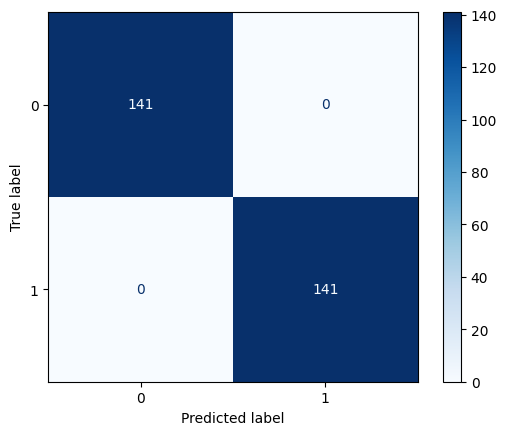

In [50]:
# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

RBF Kernel - Classification Report:
              precision    recall  f1-score   support

         0.0       0.82      0.91      0.86       141
         1.0       0.90      0.80      0.85       141

    accuracy                           0.85       282
   macro avg       0.86      0.85      0.85       282
weighted avg       0.86      0.85      0.85       282

RBF Kernel - Confusion Matrix:
[[128  13]
 [ 28 113]]


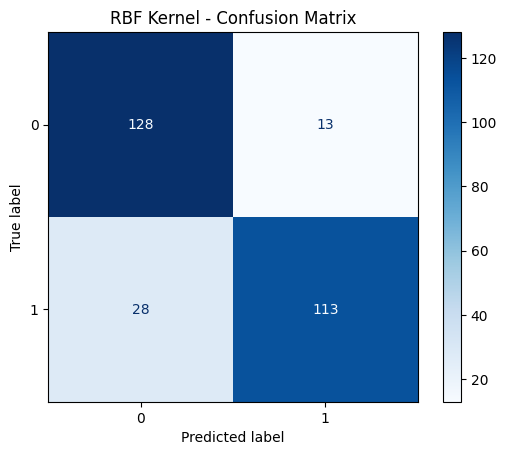

In [51]:
# Train SVM model with RBF kernel
svm_rbf = SVC(kernel='rbf')
svm_rbf.fit(X_train, y_train)

# Evaluate model
y_pred_rbf = svm_rbf.predict(X_test)
print("RBF Kernel - Classification Report:")
print(classification_report(y_test, y_pred_rbf))

# Generate and plot confusion matrix for RBF kernel
cm_rbf = confusion_matrix(y_test, y_pred_rbf)
print("RBF Kernel - Confusion Matrix:")
print(cm_rbf)

disp_rbf = ConfusionMatrixDisplay(confusion_matrix=cm_rbf)
disp_rbf.plot(cmap=plt.cm.Blues)
plt.title("RBF Kernel - Confusion Matrix")
plt.show()


Polynomial Kernel - Classification Report:
              precision    recall  f1-score   support

         0.0       0.89      0.96      0.93       141
         1.0       0.96      0.88      0.92       141

    accuracy                           0.92       282
   macro avg       0.93      0.92      0.92       282
weighted avg       0.93      0.92      0.92       282

Polynomial Kernel - Confusion Matrix:
[[136   5]
 [ 17 124]]


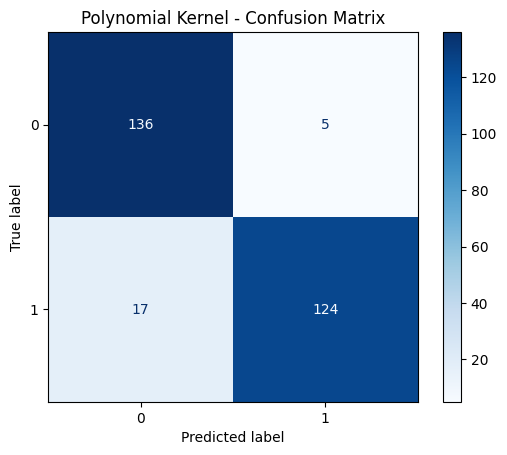

In [52]:
# Train SVM model with polynomial kernel
svm_poly = SVC(kernel='poly', degree=3)  # You can adjust the degree as needed
svm_poly.fit(X_train, y_train)

# Evaluate model
y_pred_poly = svm_poly.predict(X_test)
print("Polynomial Kernel - Classification Report:")
print(classification_report(y_test, y_pred_poly))

# Generate and plot confusion matrix for polynomial kernel
cm_poly = confusion_matrix(y_test, y_pred_poly)
print("Polynomial Kernel - Confusion Matrix:")
print(cm_poly)

disp_poly = ConfusionMatrixDisplay(confusion_matrix=cm_poly)
disp_poly.plot(cmap=plt.cm.Blues)
plt.title("Polynomial Kernel - Confusion Matrix")
plt.show()
